<a href="https://colab.research.google.com/github/AvishrantsSh/ML_Stuff/blob/main/Sequential_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [3]:
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Supporting Hand
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

(60000, 28, 28)

In [9]:
print(train_images.shape)
print(train_labels[:10])

(60000, 28, 28)
[9 0 0 3 0 2 7 2 5 5]


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

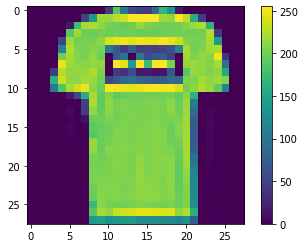

In [13]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
# Preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
# The structure of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [18]:
# Optimizers, Loss Function and Metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
print(train_images.shape)
model.fit(train_images, train_labels, batch_size=32 ,epochs=1)

(60000, 28, 28)
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3491 - accuracy: 0.8755


In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8569
Test accuracy: 0.8568999767303467


Pullover


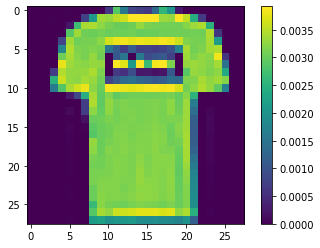

In [38]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 28


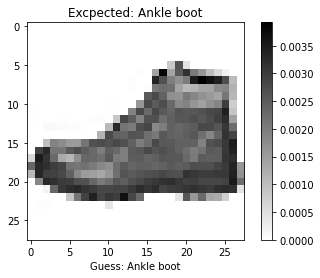

In [40]:
# Let's see if this works

def predict(model, image, correct_label):
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
